<a href="https://colab.research.google.com/github/GauriNighot76/VOIS_AICTE_Oct2025_MajorProject_GauriNighot/blob/main/Netflix_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud





In [ ]:
path = "/content/Netflix Dataset.csv"
df = pd.read_csv(path)
print(" Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns found:", list(df.columns))





 Dataset loaded successfully!
Shape: (7789, 11)
Columns found: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [ ]:
df.columns = df.columns.str.strip().str.lower()


In [ ]:
def find_col(possible_names):
    for name in possible_names:
        if name in df.columns:
            return name
    return None

In [ ]:
col_type = find_col(['type'])
col_title = find_col(['title', 'name'])
col_date_added = find_col(['date_added', 'date added'])
col_release_year = find_col(['release_year', 'release year', 'year', 'release date'])
col_duration = find_col(['duration'])
col_genre = find_col(['listed_in', 'listed in', 'category', 'genre'])
col_country = find_col(['country'])
col_rating = find_col(['rating'])
col_director = find_col(['director'])
col_cast = find_col(['cast'])

In [ ]:
if col_type:
    df[col_type] = df[col_type].astype(str).str.strip().str.title()
else:
    df['type'] = 'Unknown'
    col_type = 'type'

if col_release_year:
    df['release_year'] = pd.to_numeric(df[col_release_year], errors='coerce')
else:
    print("⚠️ No release year column found. Using NaN.")
    df['release_year'] = np.nan

if col_date_added:
    df['date_added'] = pd.to_datetime(df[col_date_added], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
else:
    df['year_added'] = np.nan

⚠️ No release year column found. Using NaN.


In [ ]:
def extract_duration(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.search(r'(\d+)', s)
    return int(m.group(1)) if m else np.nan

if col_duration:
    df['duration_num'] = df[col_duration].apply(extract_duration)
else:
    df['duration_num'] = np.nan

if col_genre:
    df['listed_in'] = df[col_genre].fillna('')
else:
    df['listed_in'] = ''

if col_country:
    df['country'] = df[col_country].fillna('')
else:
    df['country'] = ''

if col_rating:
    df['rating'] = df[col_rating].fillna('')
else:
    df['rating'] = ''

In [ ]:
print("\n📋 Basic Overview:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSample rows:")
print(df.head())


📋 Basic Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7789 non-null   object 
 1   category      7789 non-null   object 
 2   title         7789 non-null   object 
 3   director      5401 non-null   object 
 4   cast          7071 non-null   object 
 5   country       7789 non-null   object 
 6   release_date  7779 non-null   object 
 7   rating        7789 non-null   object 
 8   duration      7789 non-null   object 
 9   type          7789 non-null   object 
 10  description   7789 non-null   object 
 11  release_year  0 non-null      float64
 12  year_added    0 non-null      float64
 13  duration_num  7789 non-null   int64  
 14  listed_in     7789 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 912.9+ KB
None

Missing values per column:
show_id            0
category           0
tit

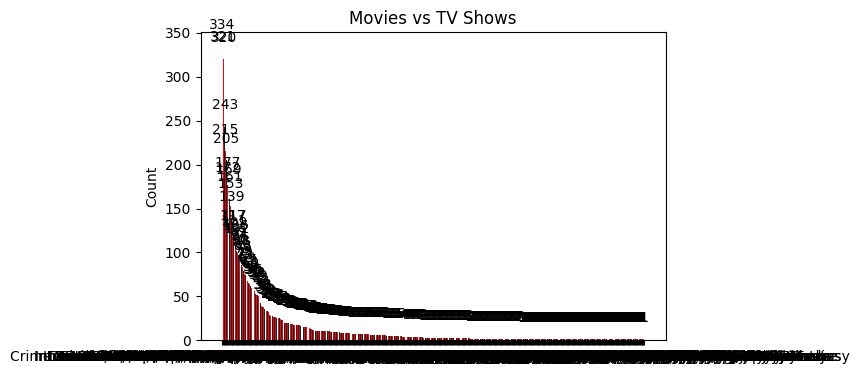

In [ ]:
type_counts = df[col_type].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['#E50914', '#221F1F'])
plt.title('Movies vs TV Shows')
plt.ylabel('Count')
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 20, str(v), ha='center', fontsize=10)
plt.show()



/tmp/ipython-input-989484494.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


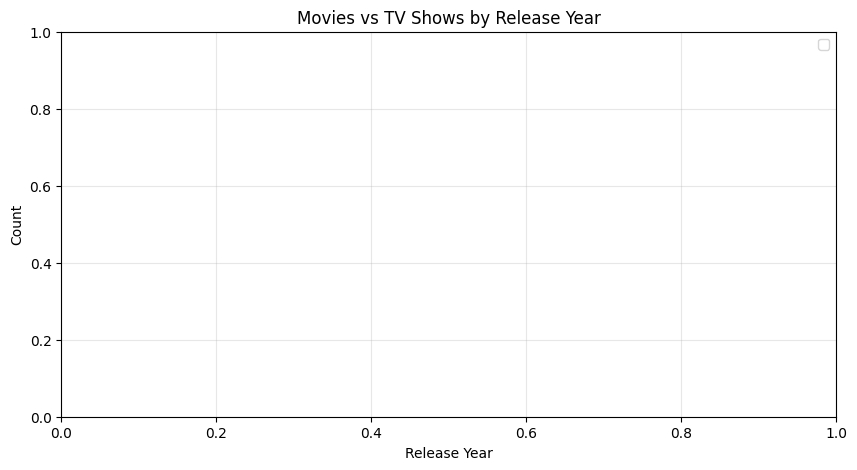

In [ ]:
trend = df.groupby(['release_year', col_type]).size().unstack(fill_value=0)
plt.figure(figsize=(10,5))
for col in trend.columns:
    plt.plot(trend.index, trend[col], marker='o', label=col)
plt.title('Movies vs TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


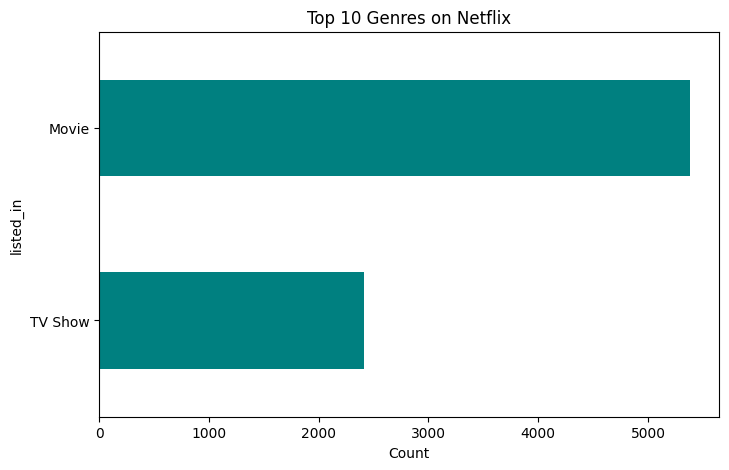

In [ ]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(8,5))
top_genres.plot(kind='barh', color='teal')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

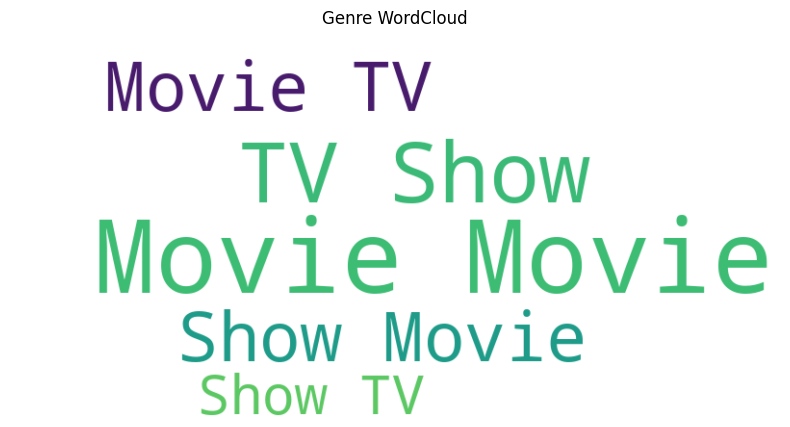

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(genres.dropna()))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre WordCloud')
plt.show()

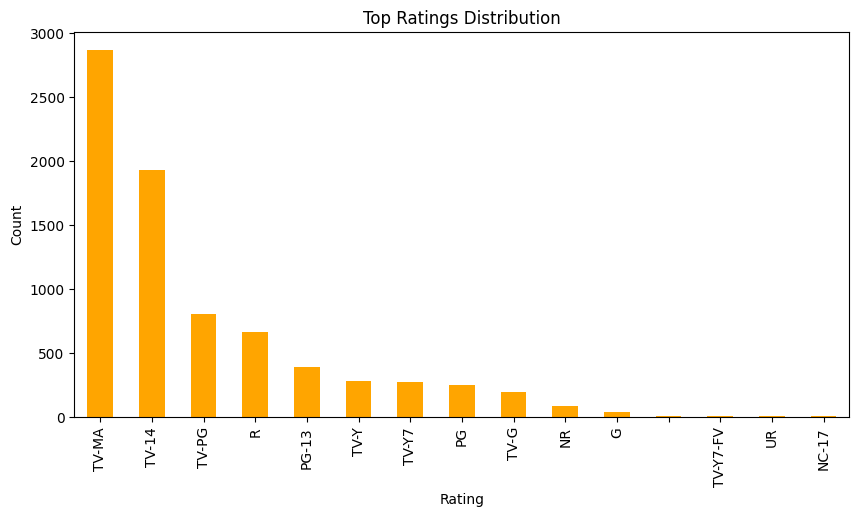

In [ ]:
top_ratings = df['rating'].value_counts().head(15)
plt.figure(figsize=(10,5))
top_ratings.plot(kind='bar', color='orange')
plt.title('Top Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

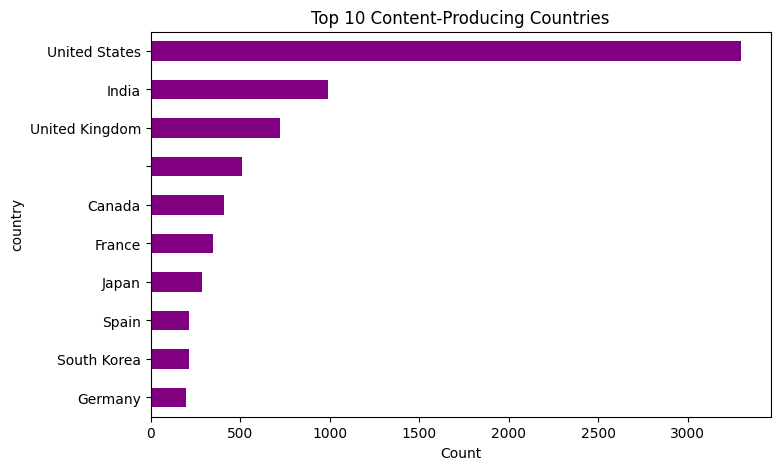

In [ ]:
countries = df['country'].str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(10)
plt.figure(figsize=(8,5))
top_countries.plot(kind='barh', color='purple')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

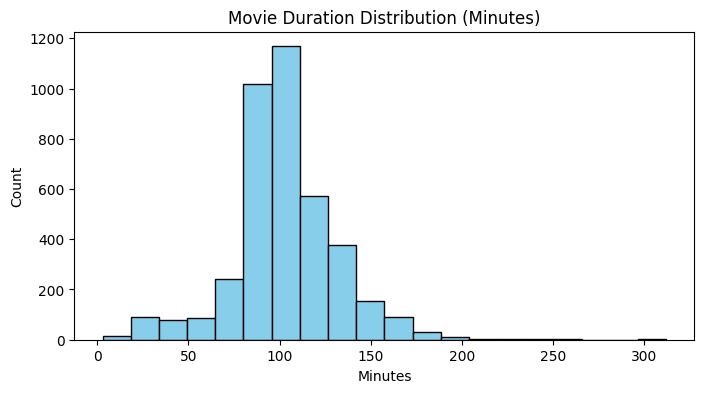

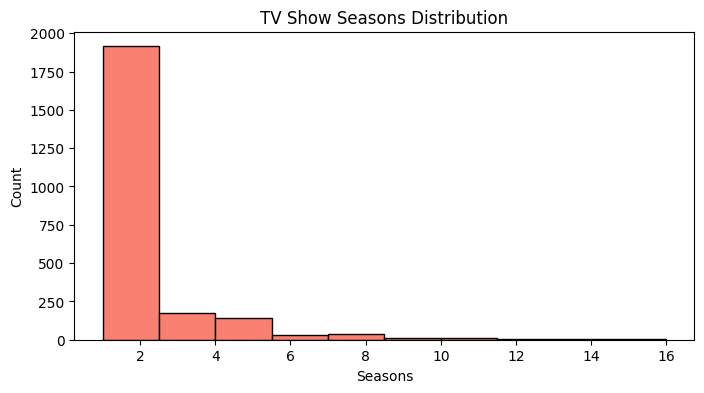

In [ ]:
movies = df[df[col_type].str.contains('Movie', case=False, na=False)]
tvshows = df[df[col_type].str.contains('Tv', case=False, na=False)]

plt.figure(figsize=(8,4))
plt.hist(movies['duration_num'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Movie Duration Distribution (Minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
plt.hist(tvshows['duration_num'].dropna(), bins=10, color='salmon', edgecolor='black')
plt.title('TV Show Seasons Distribution')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

In [ ]:
total_titles = len(df)
movies_count = (df[col_type].str.contains('Movie', case=False, na=False)).sum()
tv_count = (df[col_type].str.contains('Tv', case=False, na=False)).sum()
print(f"Total Titles: {total_titles}")
print(f"Movies: {movies_count} ({(movies_count/total_titles)*100:.1f}%)")
print(f"TV Shows: {tv_count} ({(tv_count/total_titles)*100:.1f}%)")
print("\n📊 SUMMARY INSIGHTS")


Total Titles: 7789
Movies: 3939 (50.6%)
TV Shows: 2319 (29.8%)

📊 SUMMARY INSIGHTS


In [ ]:
if df['release_year'].notna().any():
    print(f"Year Range: {int(df['release_year'].min())} – {int(df['release_year'].max())}")

In [ ]:
print("Top Genre:", top_genres.index[0])
print("Top Country:", top_countries.index[0])
print("Most Common Rating:", top_ratings.index[0])

Top Genre: Movie
Top Country: United States
Most Common Rating: TV-MA


In [ ]:
print("\n🎬 Average Movie Duration:", round(movies['duration_num'].mean(), 1), "minutes")
print("📺 Average TV Show Seasons:", round(tvshows['duration_num'].mean(), 1))


🎬 Average Movie Duration: 102.8 minutes
📺 Average TV Show Seasons: 1.8
